In [523]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [489]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [347]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [490]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [75]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

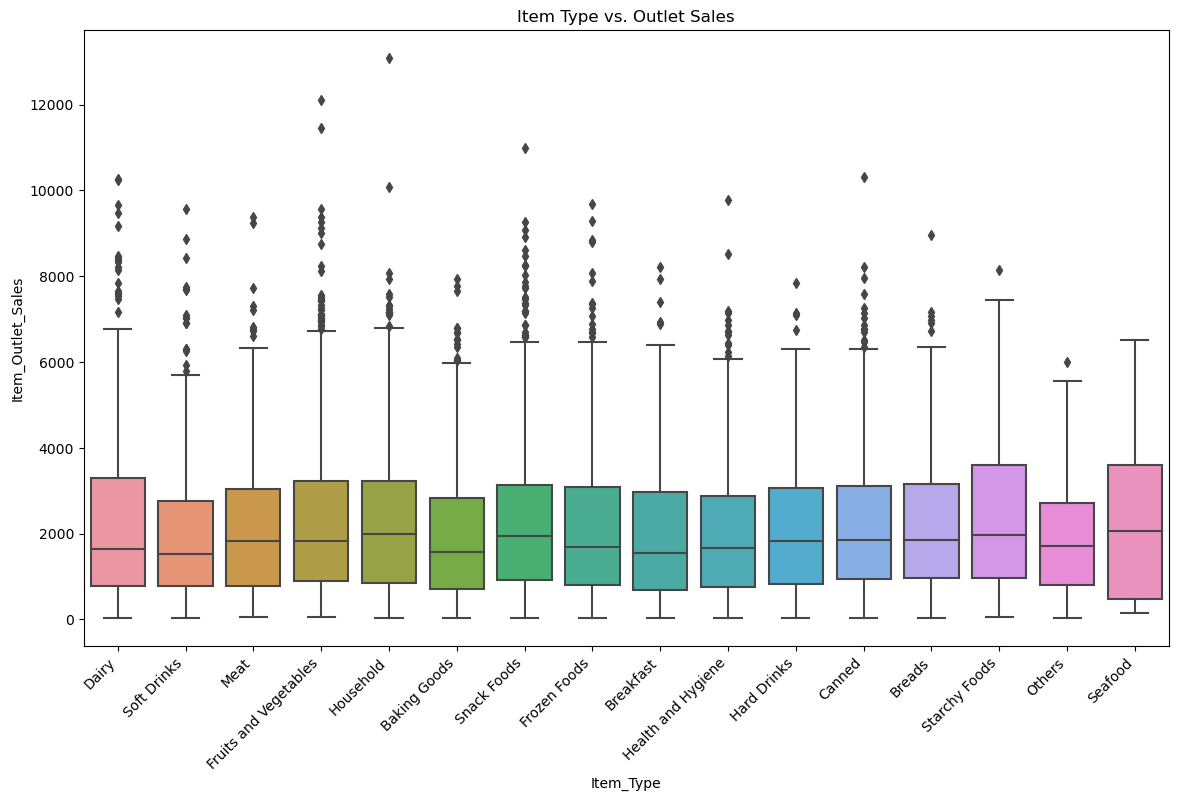

In [76]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Item Type vs. Outlet Sales')
plt.show()

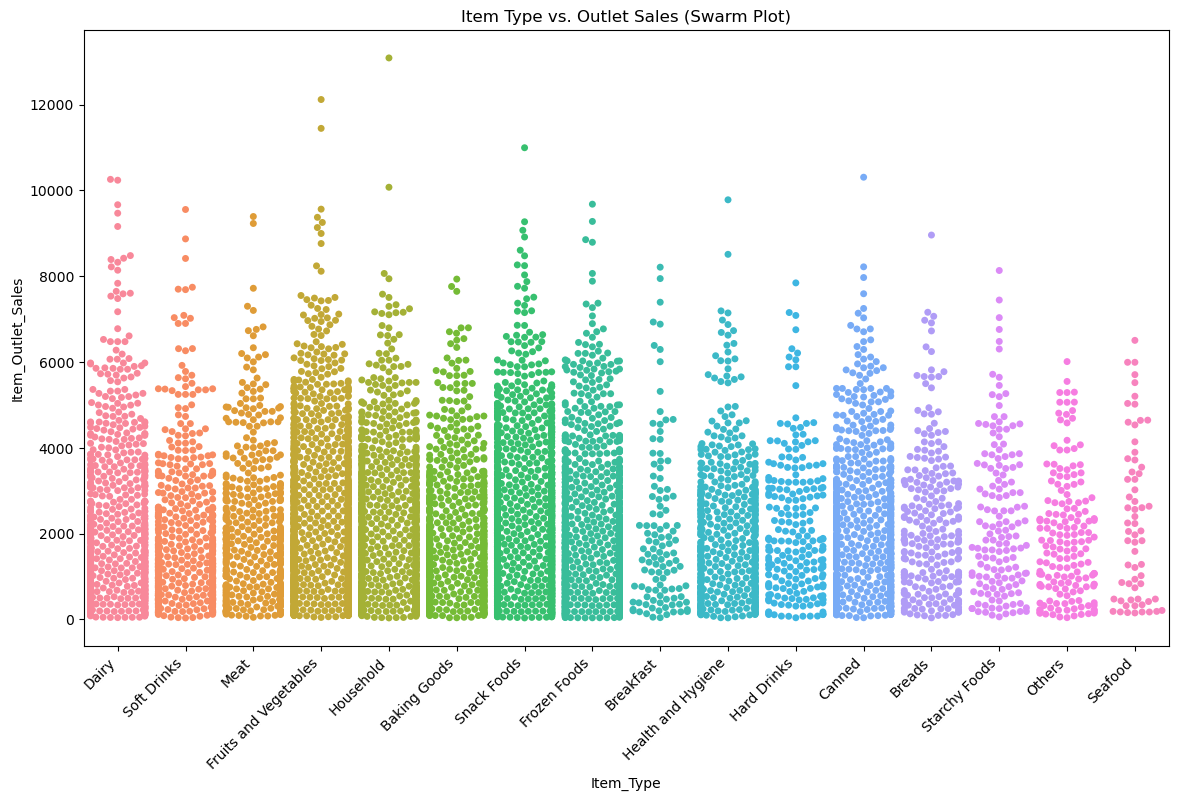

In [77]:
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=45, ha='right')
plt.title('Item Type vs. Outlet Sales (Swarm Plot)')
plt.show()

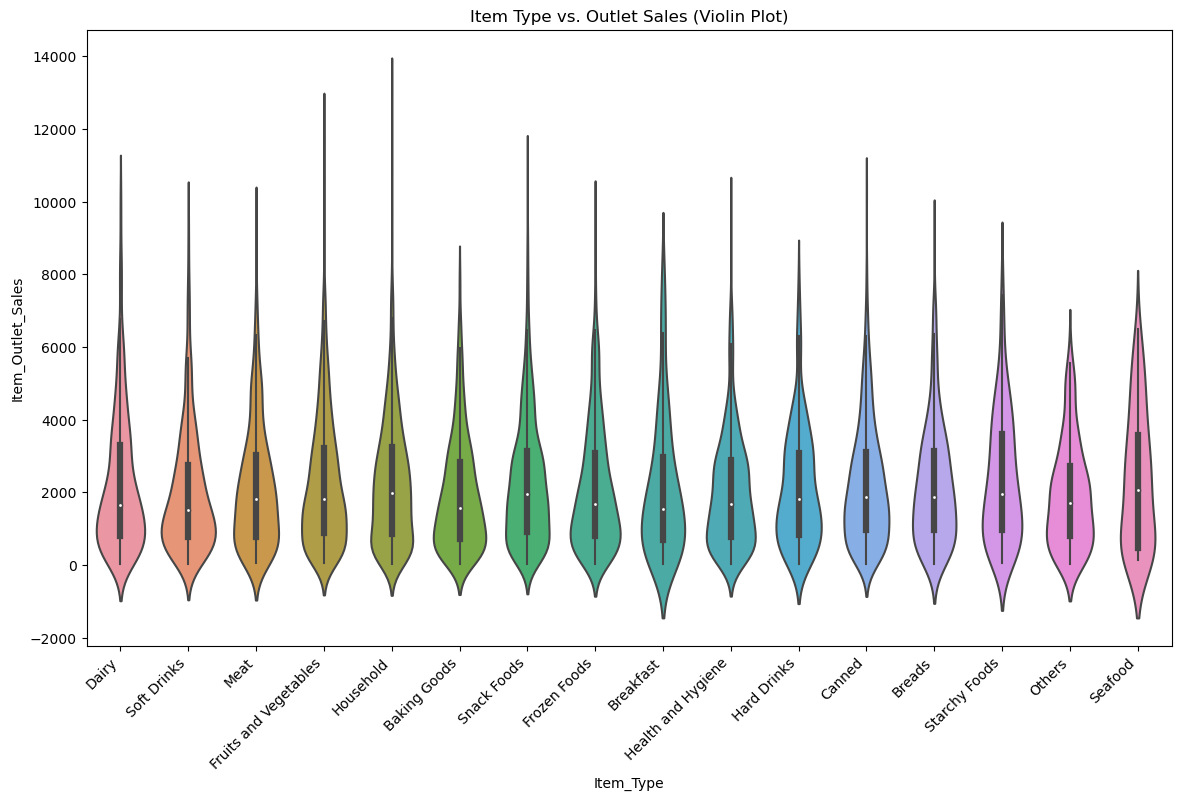

In [78]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=45, ha='right')
plt.title('Item Type vs. Outlet Sales (Violin Plot)')
plt.show()

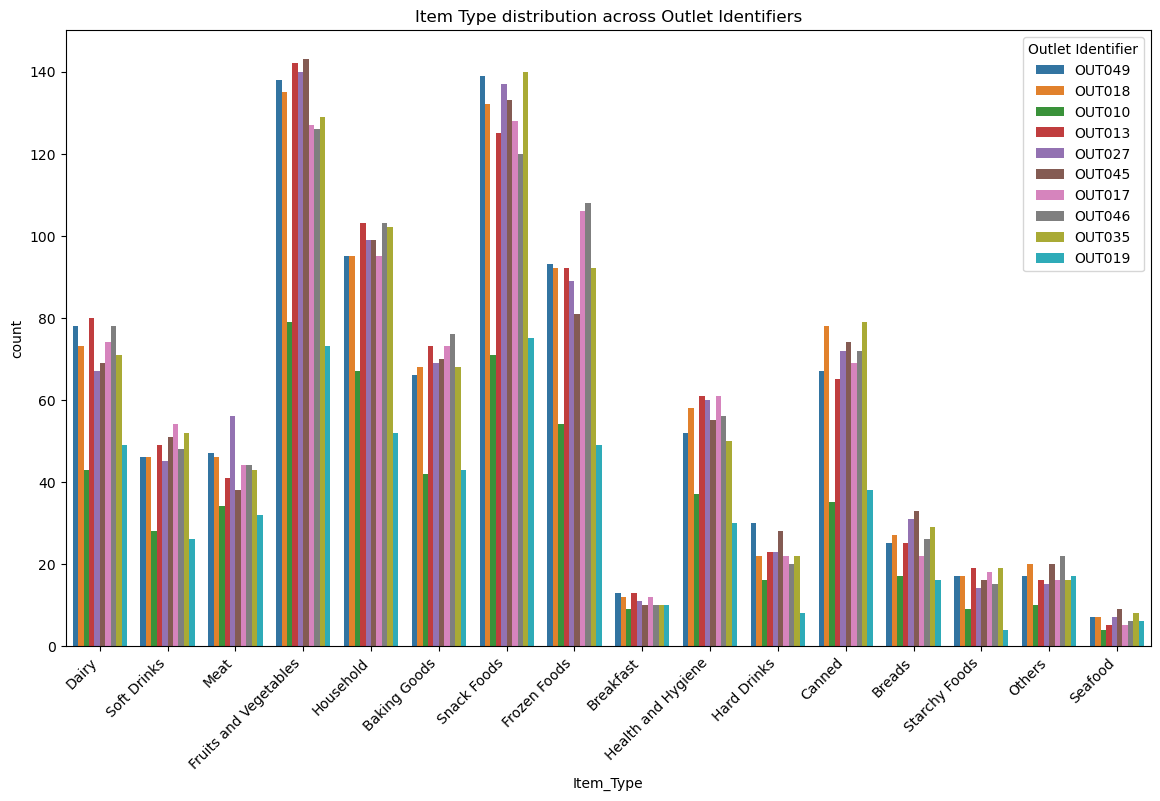

In [79]:

plt.figure(figsize=(14, 8))
sns.countplot(x='Item_Type', hue='Outlet_Identifier', data=train)
plt.xticks(rotation=45, ha='right')
plt.title('Item Type distribution across Outlet Identifiers')
plt.legend(title='Outlet Identifier', bbox_to_anchor=(1, 1))
plt.show()

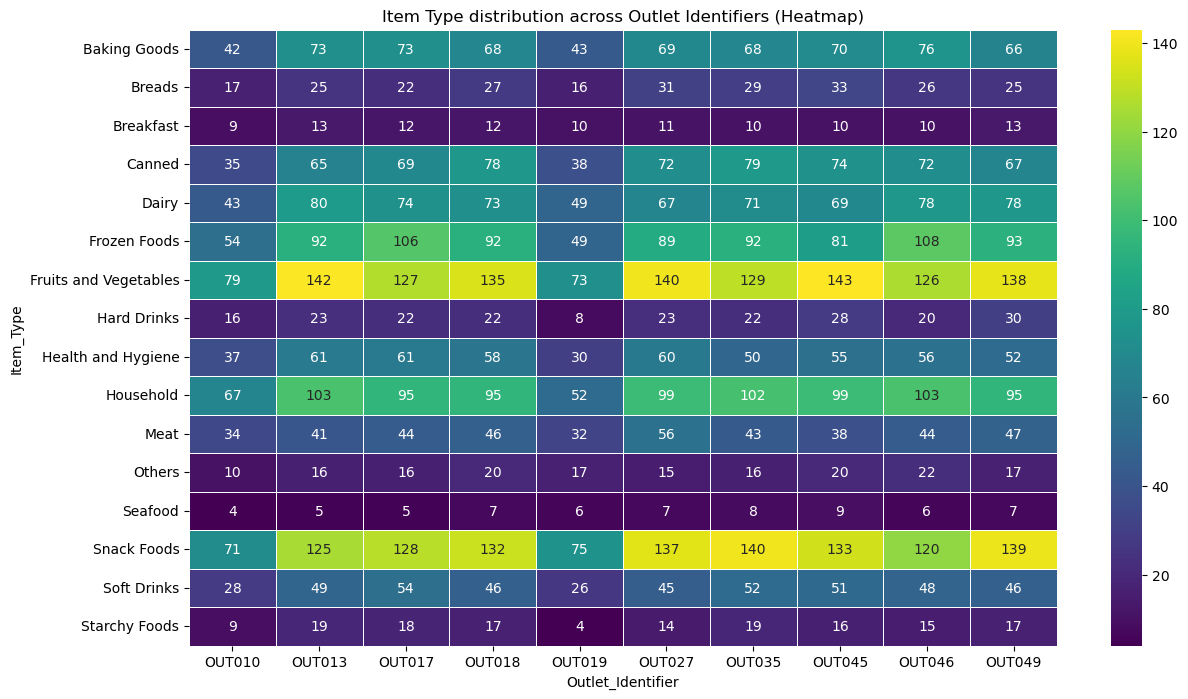

In [80]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = train.pivot_table(index='Item_Type', columns='Outlet_Identifier', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Item Type distribution across Outlet Identifiers (Heatmap)')
plt.show()

In [67]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [69]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [348]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

# Verify the changes
print(train['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [66]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [56]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [57]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [58]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [7]:
#test

In [59]:
test['Item_Identifier'].value_counts()

DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [60]:
test['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [61]:
test['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

In [62]:
test.shape

(5681, 11)

In [8]:
train.shape

(8523, 12)

In [9]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
train.shape

(8523, 12)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

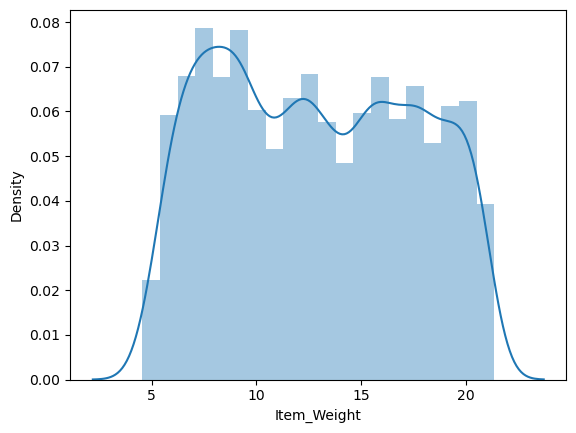

In [26]:
sns.distplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight'>

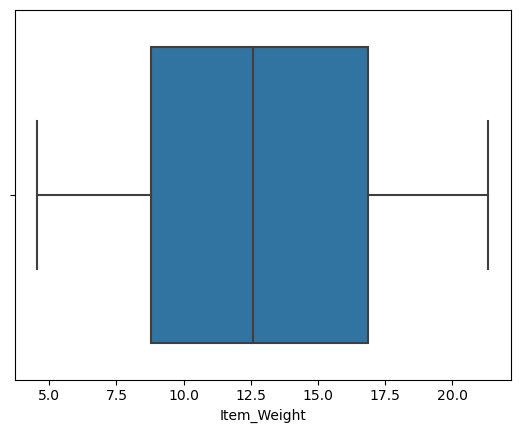

In [28]:
sns.boxplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

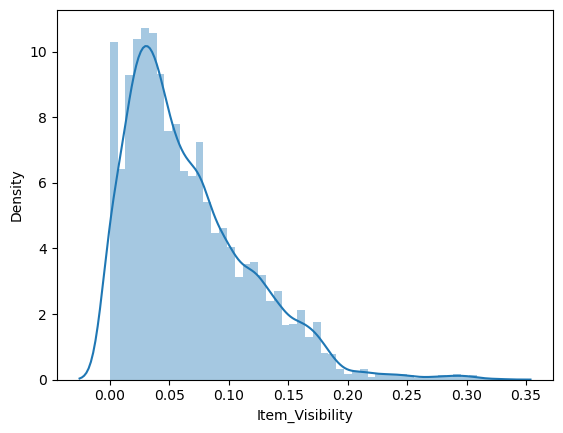

In [33]:
sns.distplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility'>

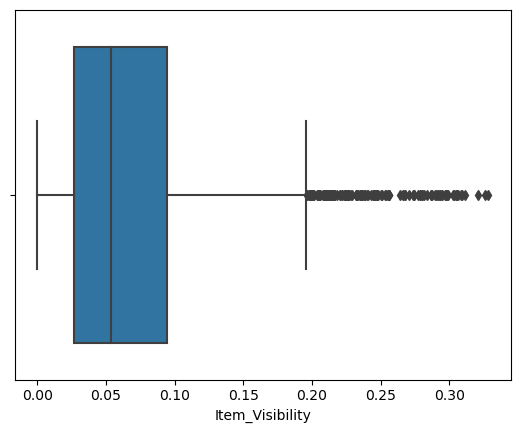

In [34]:
sns.boxplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

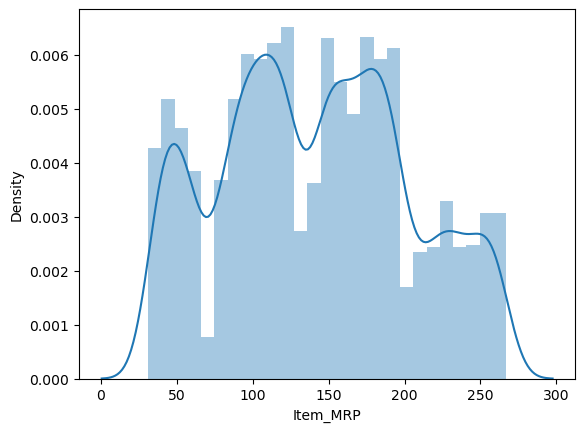

In [35]:
sns.distplot(train['Item_MRP'])

<AxesSubplot:xlabel='Item_MRP'>

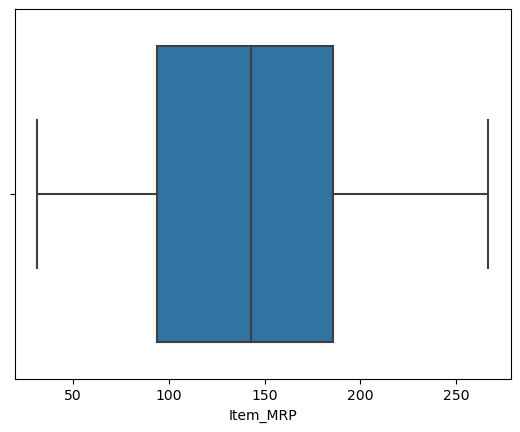

In [36]:
sns.boxplot(train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

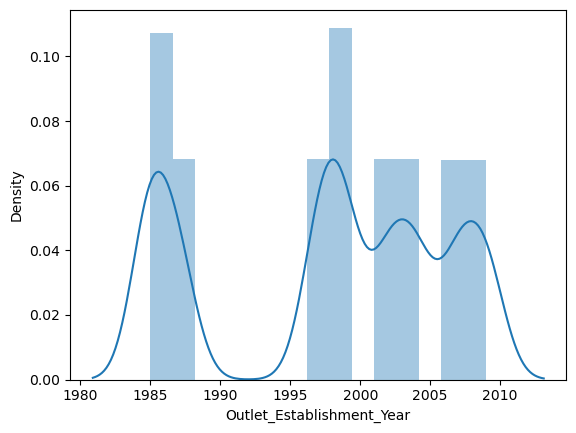

In [37]:
sns.distplot(train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

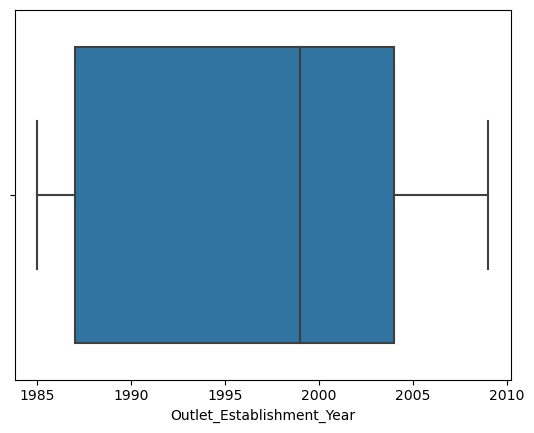

In [38]:
sns.boxplot(train['Outlet_Establishment_Year'])

In [190]:
#Z-score Method
up_limit = train['Item_Visibility'].mean() + 3*train['Item_Visibility'].std()
low_limit = train['Item_Visibility'].mean() - 3*train['Item_Visibility'].std()
print('upper limit:',up_limit )
print('lower limit:',low_limit )

upper limit: 0.22092549574235687
lower limit: -0.08866143818445432


In [191]:
#capping- changing the outlier values to upper or lower limit values
new_train = train.copy()
new_train.loc[(new_train['Item_Visibility']> up_limit), 'Item_Visibility']= up_limit
new_train.loc[(new_train['Item_Visibility']< low_limit), 'Item_Visibility']= low_limit

<AxesSubplot:xlabel='Item_Visibility'>

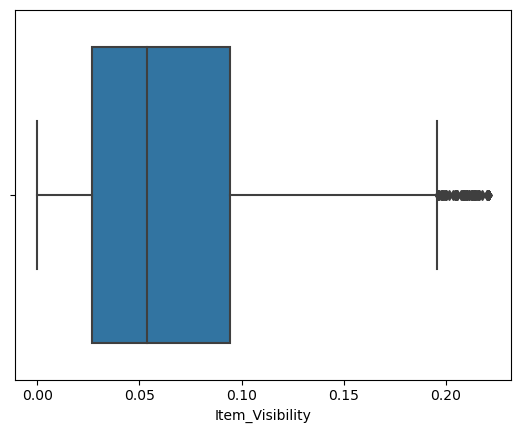

In [192]:
sns.boxplot(new_train['Item_Visibility'])

In [45]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [46]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [349]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [350]:
test['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [195]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [351]:
test['Outlet_Size'].fillna('Not Applicable', inplace=True)

In [352]:
train['Outlet_Size'].fillna('Not Applicable', inplace=True)

In [198]:
train['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

In [199]:
train['Outlet_Size'].value_counts()

Medium            2793
Not Applicable    2410
Small             2388
High               932
Name: Outlet_Size, dtype: int64

In [200]:
test['Outlet_Size'].value_counts()

Medium            1862
Not Applicable    1606
Small             1592
High               621
Name: Outlet_Size, dtype: int64

In [353]:
duplicate= train.duplicated()
print(duplicate.sum())

0


In [47]:
#pd.options.display.float_format = '{:,.2f}'.format
outlet_sales = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
#pd.options.display.float_format = None
outlet_sales.sort_values(inplace=True)


In [48]:
outlet_sales

Outlet_Identifier
OUT019     179,694.09
OUT010     188,340.17
OUT018   1,851,822.83
OUT045   2,036,725.48
OUT046   2,118,395.17
OUT013   2,142,663.58
OUT017   2,167,465.29
OUT049   2,183,969.81
OUT035   2,268,122.94
OUT027   3,453,926.05
Name: Item_Outlet_Sales, dtype: float64

In [68]:
outlet_sales2 = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['sum', 'mean'])

In [72]:
outlet_sales2.sort_values(by=['sum'],inplace=True)

In [73]:
outlet_sales2

,sum,mean
Outlet_Identifier,,
OUT019,"179,694.09",340.33
OUT010,"188,340.17",339.35
OUT018,"1,851,822.83","1,995.50"
OUT045,"2,036,725.48","2,192.38"
OUT046,"2,118,395.17","2,277.84"
OUT013,"2,142,663.58","2,299.00"
OUT017,"2,167,465.29","2,340.68"
OUT049,"2,183,969.81","2,348.35"
OUT035,"2,268,122.94","2,438.84"


In [90]:
df = pd.DataFrame(outlet_sales2)

In [94]:
df = df.reset_index()  # Create a new column named "index"
df = df.rename(columns={'index': 'Outlet_Identifier'})

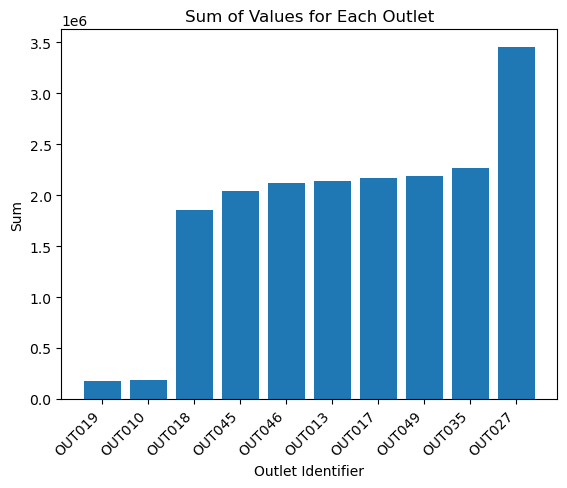

In [103]:
plt.bar(df['Outlet_Identifier'], df['sum'])  # Adjust column names as needed
plt.xlabel("Outlet Identifier")
plt.ylabel("Sum")
plt.title("Sum of Values for Each Outlet")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

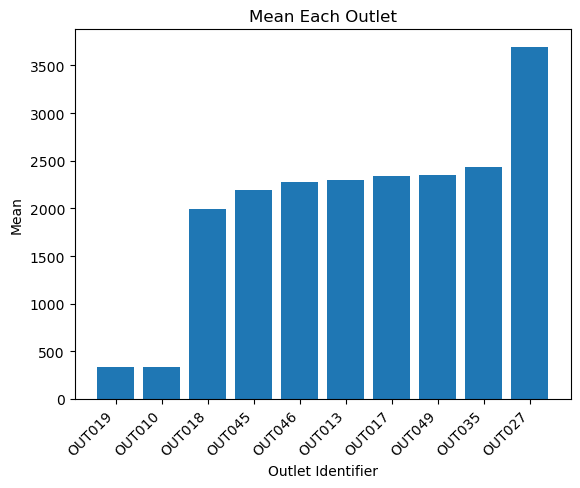

In [104]:
plt.bar(df['Outlet_Identifier'], df['mean'])  # Adjust column names as needed
plt.xlabel("Outlet Identifier")
plt.ylabel("Mean")
plt.title("Mean Each Outlet")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [43]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


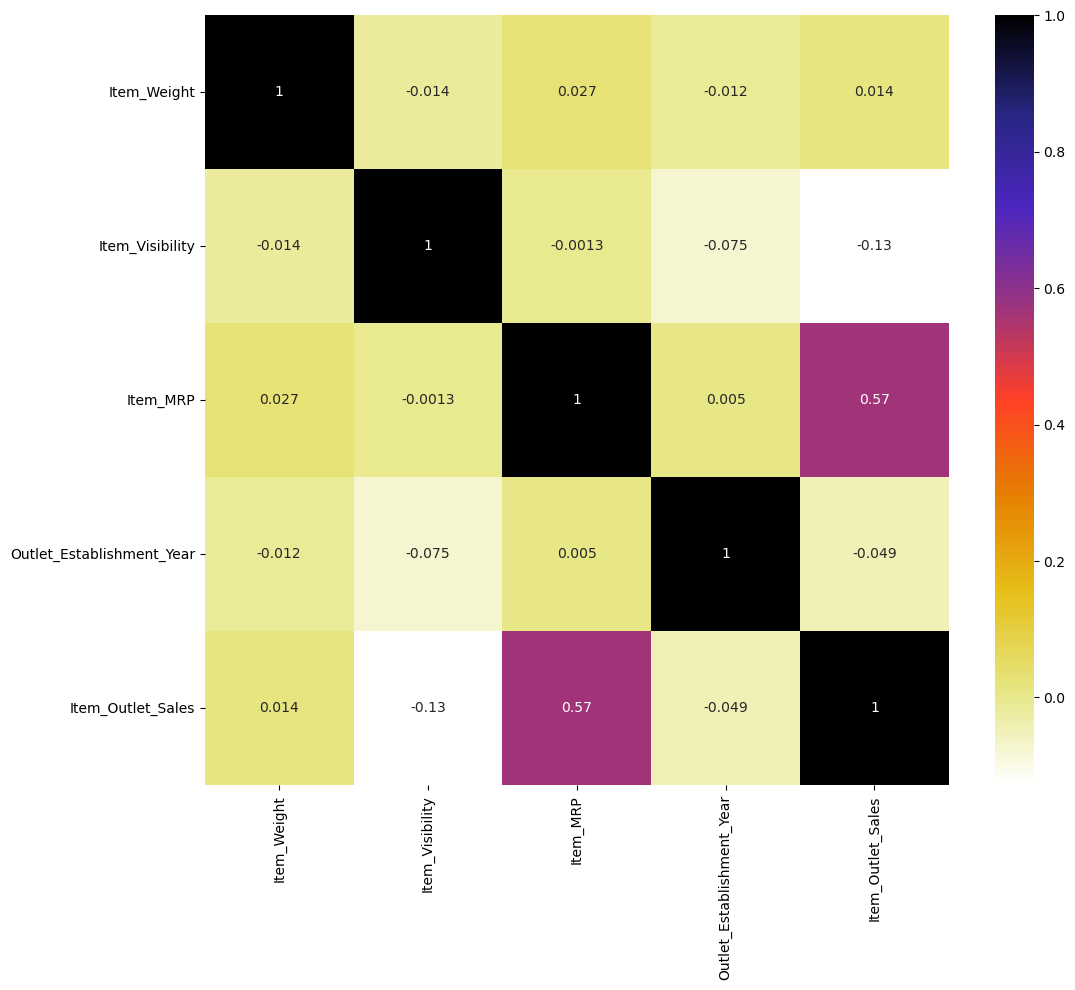

In [44]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap='CMRmap_r')
plt.show()

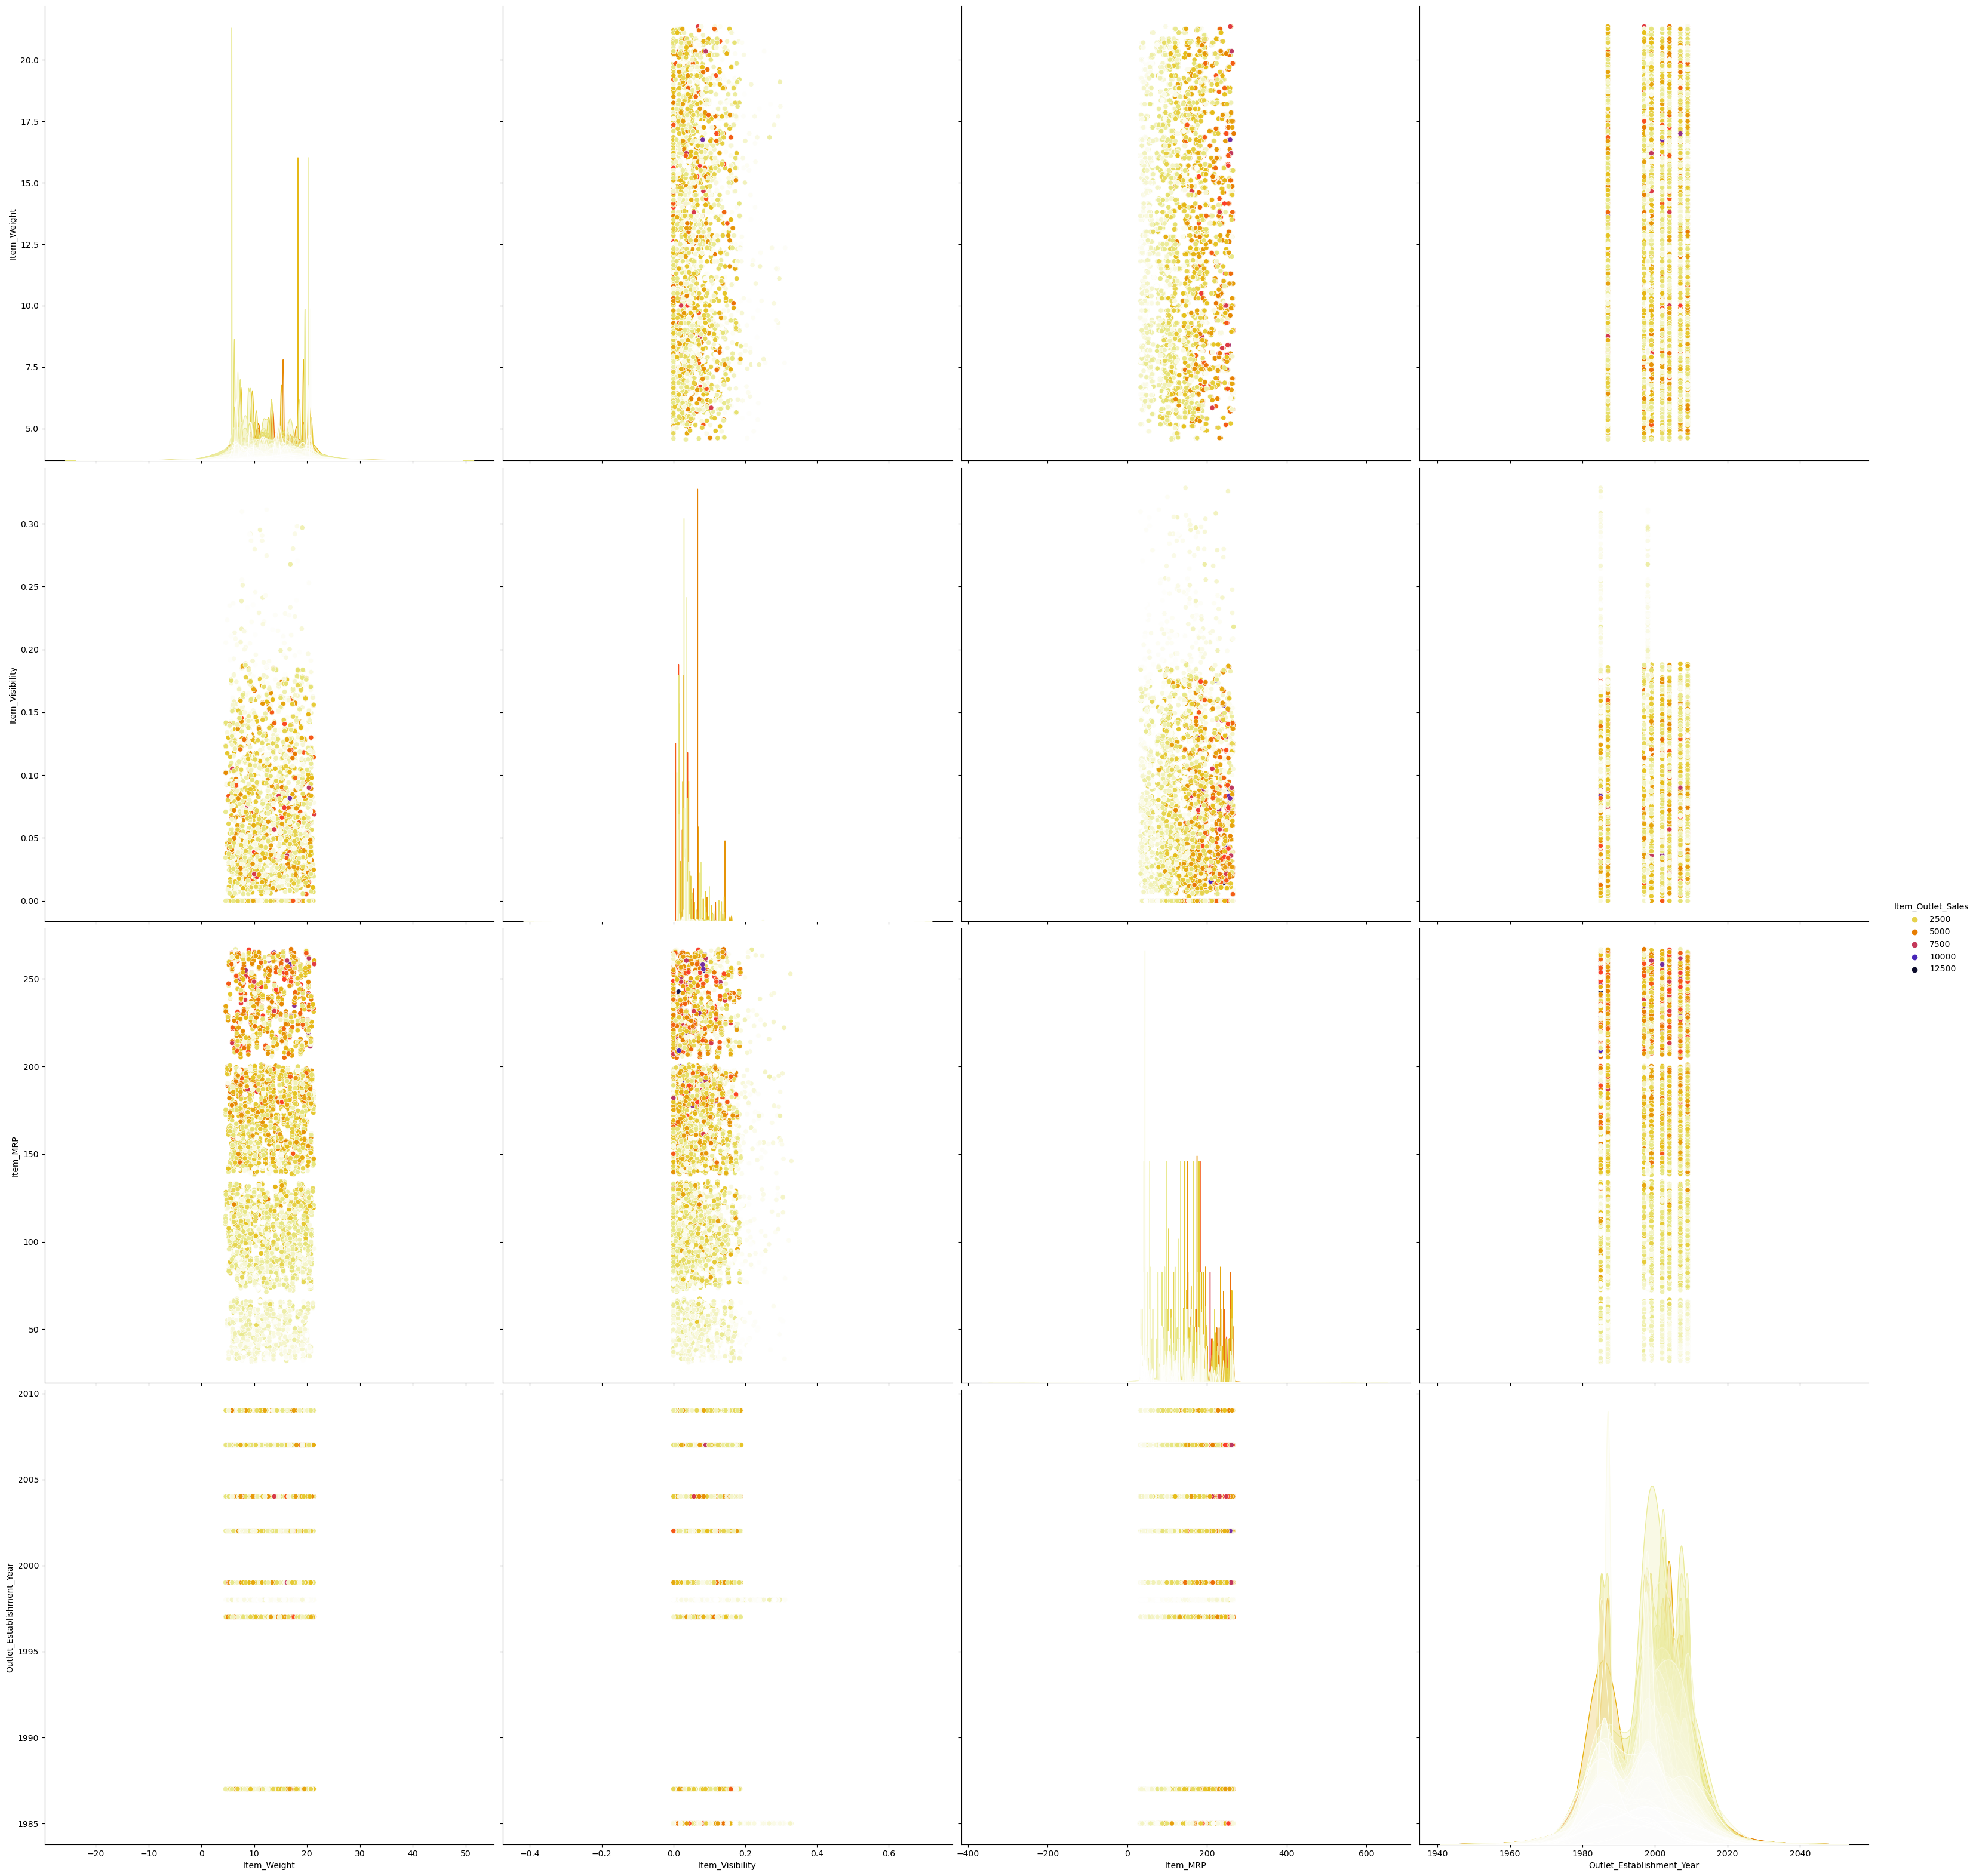

In [19]:
#multivariate
numerical_columns = train.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numerical_columns, hue="Item_Outlet_Sales", size=8, height=8, palette='CMRmap_r')
plt.show()

In [354]:
train= train.drop(['Outlet_Establishment_Year', 'Item_Identifier'], axis=1)

In [355]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Not Applicable,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Not Applicable,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


In [356]:
train_rf= train.copy()

In [357]:
train_rf

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Not Applicable,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Not Applicable,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


In [388]:
train_rf.to_csv('train_rf.csv')

In [358]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
print("numerical columns:", numerical_cols)

numerical columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')


In [360]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
st_x

StandardScaler()

In [361]:
train['Item_Weight']= st_x.fit_transform(train[['Item_Weight']])
train['Item_Visibility']= st_x.fit_transform(train[['Item_Visibility']])
train['Item_MRP']= st_x.fit_transform(train[['Item_MRP']])

In [362]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,Low Fat,-0.970732,Dairy,1.747454,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,-1.641706,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,1.098554,Low Fat,-0.956917,Meat,0.010040,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,1.500838,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,Not Applicable,Tier 3,Grocery Store,732.3800
4,-0.929428,Low Fat,-1.281758,Household,-1.399220,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,Low Fat,-0.181193,Snack Foods,1.180783,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,-1.059578,Regular,-0.371154,Baking Goods,-0.527301,OUT045,Not Applicable,Tier 2,Supermarket Type1,549.2850
8520,-0.534243,Low Fat,-0.599784,Health and Hygiene,-0.897208,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,-1.336444,Regular,1.532880,Snack Foods,-0.607977,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


In [204]:
categorical_columns = train.select_dtypes(include='object').columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [363]:
#Catgorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [364]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(train[["Item_Type", "Outlet_Identifier"]])

# Create column names for the new one-hot encoded columns
columns = encoder.get_feature_names(["item_type", "outlet_identifier"])

# Create a DataFrame with the new one-hot encoded columns
dummies = pd.DataFrame(encoded_cols, columns=columns)

# Concatenate the original DataFrame with the new one-hot encoded columns
train = pd.concat([train, dummies], axis=1)

# Drop the original categorical columns
train.drop(["Item_Type", "Outlet_Identifier"], axis=1, inplace=True)

In [365]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_type_Breads,item_type_Breakfast,...,item_type_Starchy Foods,outlet_identifier_OUT013,outlet_identifier_OUT017,outlet_identifier_OUT018,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049
0,-0.841872,Low Fat,-0.970732,1.747454,Medium,Tier 1,Supermarket Type1,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.641706,Regular,-0.908111,-1.489023,Medium,Tier 3,Supermarket Type2,443.4228,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.098554,Low Fat,-0.956917,0.010040,Medium,Tier 1,Supermarket Type1,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.500838,Regular,-1.281758,0.660050,Not Applicable,Tier 3,Grocery Store,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.929428,Low Fat,-1.281758,-1.399220,High,Tier 3,Supermarket Type1,994.7052,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,Low Fat,-0.181193,1.180783,High,Tier 3,Supermarket Type1,2778.3834,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,-1.059578,Regular,-0.371154,-0.527301,Not Applicable,Tier 2,Supermarket Type1,549.2850,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,-0.534243,Low Fat,-0.599784,-0.897208,Small,Tier 2,Supermarket Type1,1193.1136,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8521,-1.336444,Regular,1.532880,-0.607977,Medium,Tier 3,Supermarket Type2,1845.5976,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
# Apply label encoding to each ordinal categorical column
ordinal_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [367]:
label_encoder= LabelEncoder()
for col in ordinal_columns:
    train[col + '_encoded'] = label_encoder.fit_transform(train[col])
# Now, the DataFrame 'df' has new columns with the encoded values
# The new columns will be named like 'Item_Fat_Content_encoded', 'Outlet_Size_encoded', etc.    

In [368]:
# Drop the original columns after encoding
train_encoded = train.copy()  # Create a copy of the DataFrame

for col in ordinal_columns:
    train_encoded[col + '_encoded'] = label_encoder.fit_transform(train_encoded[col])
    train_encoded.drop(col, axis=1, inplace=True)

# Now df_encoded contains only the encoded columns

In [369]:
train_encoded

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,...,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,Item_Fat_Content_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,-0.841872,-0.970732,1.747454,3735.1380,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1
1,-1.641706,-0.908111,-1.489023,443.4228,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,2
2,1.098554,-0.956917,0.010040,2097.2700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1
3,1.500838,-1.281758,0.660050,732.3800,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2,0
4,-0.929428,-1.281758,-1.399220,994.7052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.181193,1.180783,2778.3834,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,1
8519,-1.059578,-0.371154,-0.527301,549.2850,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,2,1,1
8520,-0.534243,-0.599784,-0.897208,1193.1136,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,3,1,1
8521,-1.336444,1.532880,-0.607977,1845.5976,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,2


In [371]:
x = train_encoded.drop(['Item_Outlet_Sales'], axis=1)
y = train_encoded['Item_Outlet_Sales']

In [372]:
# Splitting the dataset into training and test set. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)


In [373]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [374]:
print('coefficient of slope:', regressor.coef_)
print('intercept:', regressor.intercept_)

coefficient of slope: [  -7.12513182  -17.04757252  956.67593971  -96.02116218  -19.13019137
   30.60685518  -99.56061299  -44.83206005  -13.68637638  -12.72978907
  -52.64226812  -53.16275543  -12.66185926  -19.63799726  194.25247299
    9.98099219  -55.99486269   43.95108888  507.96724912  524.44212925
 -637.05844695 -700.94340269   25.73799255  713.28756406  371.53005405
  163.84215025  -61.70354481   31.48557993 -166.7241874  -411.65015288
 1022.46268567]
intercept: 1579.9198199310806


In [375]:
#Predicting the Test set result;
y_pred= regressor.predict(x_test)

In [376]:
#To compare the actual output values for X_test with the predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(df.to_string())

In [377]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rsme = np.sqrt(mse)
print('mse:', mse)
print('mae:', mae)
print('rsme',rsme)

mse: 1331589.963084864
mae: 861.3310520668505
rsme 1153.9453899924658


In [378]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
print('R2 SCORE:',r2score )

R2 SCORE: 0.5627080481600449


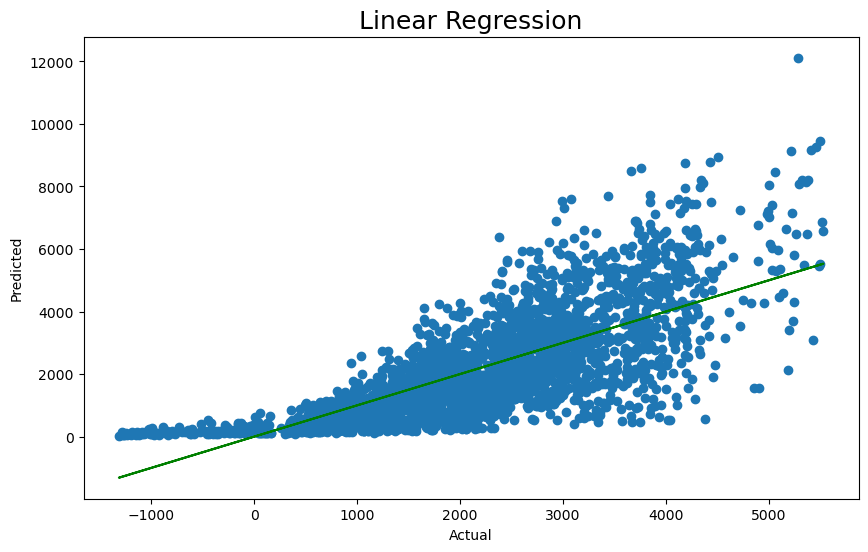

In [379]:
#plot training data plot best fit line
plt.figure(figsize = (10,6))
plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_pred, color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression", fontsize=18)
plt.show()

In [380]:
regressor.score(x_test, y_test)

0.5627080481600449

In [381]:
regressor.score(x_train, y_train)

0.5633974724933987

##This indicates that  model is consistent in explaining the variance in both the training and test datasets.


In [382]:
#Regularized Linear Regression
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50, max_iter =100, tol =0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [383]:
lasso_reg.score(x_test, y_test)

0.5109407187319823

In [384]:
lasso_reg.score(x_train, y_train)

0.5139506193939396

In [385]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 50, max_iter =100, tol =0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [386]:
ridge_reg.score(x_test, y_test)

0.5611259865486398

In [387]:
ridge_reg.score(x_train, y_train)

0.5625970725525096

In [389]:
train_rf

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Not Applicable,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Not Applicable,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


In [390]:
#Catgorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [391]:
# Create a OneHotEncoder instance
encoder_rf = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_cols_rf = encoder_rf.fit_transform(train_rf[["Item_Type", "Outlet_Identifier"]])

# Create column names for the new one-hot encoded columns
columns_rf = encoder_rf.get_feature_names(["item_type", "outlet_identifier"])

# Create a DataFrame with the new one-hot encoded columns
dummies_rf = pd.DataFrame(encoded_cols, columns=columns)

# Concatenate the original DataFrame with the new one-hot encoded columns
train_rf = pd.concat([train_rf, dummies_rf], axis=1)

# Drop the original categorical columns
train_rf.drop(["Item_Type", "Outlet_Identifier"], axis=1, inplace=True)

In [392]:
# Apply label encoding to each ordinal categorical column
ordinal_columns_rf = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [393]:
label_encoder_rf= LabelEncoder()
for col in ordinal_columns_rf:
    train_rf[col + '_encoded'] = label_encoder_rf.fit_transform(train_rf[col])

In [394]:
# Drop the original columns after encoding
train_encoded_rf = train_rf.copy()  # Create a copy of the DataFrame

for col in ordinal_columns_rf:
    train_encoded_rf[col + '_encoded'] = label_encoder_rf.fit_transform(train_encoded_rf[col])
    train_encoded_rf.drop(col, axis=1, inplace=True)

# Now df_encoded contains only the encoded columns

In [395]:
train_encoded_rf

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,...,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,Item_Fat_Content_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,9.300,0.016047,249.8092,3735.1380,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1
1,5.920,0.019278,48.2692,443.4228,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,2
2,17.500,0.016760,141.6180,2097.2700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1
3,19.200,0.000000,182.0950,732.3800,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2,0
4,8.930,0.000000,53.8614,994.7052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,1
8519,8.380,0.046982,108.1570,549.2850,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,2,1,1
8520,10.600,0.035186,85.1224,1193.1136,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,3,1,1
8521,7.210,0.145221,103.1332,1845.5976,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,2


In [396]:
x_rf= train_encoded_rf.drop(['Item_Outlet_Sales'], axis=1)
y_rf =train_encoded_rf['Item_Outlet_Sales']

In [397]:
from sklearn.model_selection import train_test_split
x_train_rf, x_test_rf, y_train_rf, y_test_rf= train_test_split(x_rf, y_rf, test_size= 0.3, random_state=0)
from sklearn.metrics import mean_squared_error
#XG Boost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
#xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [398]:
xgb_model.score(x_test_rf, y_test_rf)

-1.633641309656484

In [400]:
xgb_model.score(x_train_rf, y_train_rf)

-1.8996489142654278

In [312]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Create a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

In [401]:
# Fit the model to the training data
rf_model.fit(x_train_rf, y_train_rf)

RandomForestRegressor(random_state=42)

In [402]:
rf_model.score(x_test_rf, y_test_rf)

0.5623182157277179

In [403]:
rf_model.score(x_train_rf, y_train_rf)

0.9373847785062472

In [404]:
#Predicting the Test set result;
y_pred_rf= rf_model.predict(x_test_rf)

In [406]:
#To compare the actual output values for X_test with the predicted value
df_pred = pd.DataFrame({'Actual': y_test_rf, 'Predicted': y_pred_rf})
print(df_pred.to_string())

          Actual    Predicted
4931   1426.1436  2398.651028
4148   1201.7690  1556.254236
7423   1836.2764  2753.242792
4836   2410.8618  2101.937258
944    1549.9824  2200.835190
154    3169.2080  3725.344082
7230   2036.6822  2812.425754
3472    824.9262  1825.770076
2294    378.1744   483.896782
2588   1573.9512  1626.948880
2087   2474.7786  2038.766154
7318    101.8674   587.375418
6126    894.8352  1397.560806
4164   1491.3920  2086.091218
6572   1390.1904  2138.123488
693    1707.7770  1232.222692
1270   1853.5872  2552.004742
5893   2404.8696  3330.358232
1624   5528.1374  3328.134460
5223  12117.5600  6924.652900
2972   4767.1280  2494.745942
6814    185.7582   679.122658
1555    187.0898   657.457526
8275    772.3280  1402.201432
3760   1324.2762  2361.858920
3161   2036.6822  1554.849398
5225   6574.7750  5488.335876
1570   5285.1204  3984.366914
4285    773.6596  1018.620736
1835   6615.3888  3948.939696
4266   1022.6688  1679.160916
2740   2797.6916  5259.780052
4312   309

In [407]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_rf, y_train_rf)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to create a final model
final_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', booster='gbtree', random_state=42, **best_params)
final_xgb_model.fit(x_train_rf, y_train_rf)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [410]:
final_xgb_model.score(x_test_rf, y_test_rf)

0.5918609711093767

In [411]:
final_xgb_model.score(x_train_rf, y_train_rf)

0.6158242073813642

In [412]:
#Predicting the Test set result;
y_pred_XGBRF= final_xgb_model.predict(x_test_rf)

In [491]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [492]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [493]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [494]:
test= test.drop(['Outlet_Establishment_Year', 'Item_Identifier'], axis=1)

In [495]:
test_rf = test.copy()

In [496]:
test_rf

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,OUT017,NaN,Tier 2,Supermarket Type1


In [497]:
# Create a OneHotEncoder instance
encoder_ = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_cols_rf = encoder_.fit_transform(test_rf[["Item_Type", "Outlet_Identifier"]])

# Create column names for the new one-hot encoded columns
columns = encoder_.get_feature_names(["item_type", "outlet_identifier"])

# Create a DataFrame with the new one-hot encoded columns
dummies_ = pd.DataFrame(encoded_cols_rf, columns=columns)  # Corrected variable name

# Concatenate the original DataFrame with the new one-hot encoded columns
test_rf = pd.concat([test_rf, dummies_], axis=1)

# Drop the original categorical columns
test_rf.drop(["Item_Type", "Outlet_Identifier"], axis=1, inplace=True)

In [498]:
test_rf.reset_index(drop=True, inplace=True)
dummies_.reset_index(drop=True, inplace=True)

In [499]:
test_rf

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_type_Breads,item_type_Breakfast,item_type_Canned,...,item_type_Starchy Foods,outlet_identifier_OUT013,outlet_identifier_OUT017,outlet_identifier_OUT018,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049
0,20.750,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8.300,reg,0.038428,87.3198,NaN,Tier 2,Supermarket Type1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.600,Low Fat,0.099575,241.7538,NaN,Tier 3,Grocery Store,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.315,Low Fat,0.015388,155.0340,NaN,Tier 2,Supermarket Type1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,141.3154,Small,Tier 1,Supermarket Type1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5677,7.600,Regular,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5678,10.000,Low Fat,0.073529,118.7440,NaN,Tier 2,Supermarket Type1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5679,15.300,Regular,0.000000,214.6218,NaN,Tier 2,Supermarket Type1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [504]:
# Apply label encoding to each ordinal categorical column
ordinal_columns_ = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [501]:
label_encoder_r= LabelEncoder()
for col in ordinal_columns_:
    test_rf[col + '_encoded'] = label_encoder_r.fit_transform(test_rf[col])

In [502]:
# Drop the original columns after encoding
test_encoded_rf = test_rf.copy()  # Create a copy of the DataFrame

for col in ordinal_columns_:
    test_encoded_rf[col + '_encoded'] = label_encoder_r.fit_transform(test_encoded_rf[col])
    test_encoded_rf.drop(col, axis=1, inplace=True)

# Now df_encoded contains only the encoded columns

In [503]:
test_encoded_rf

,Item_Weight,Item_Visibility,Item_MRP,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,item_type_Hard Drinks,...,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,Item_Fat_Content_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,20.750,0.007565,107.8622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1
1,8.300,0.038428,87.3198,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,3,1,1
2,14.600,0.099575,241.7538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2,0
3,7.315,0.015388,155.0340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,1
4,NaN,0.118599,234.2300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,2,0,1
5677,7.600,0.142991,169.1448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2,2
5678,10.000,0.073529,118.7440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,3,1,1
5679,15.300,0.000000,214.6218,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,3,1,1


In [507]:
test_encoded_rf.isnull().sum()
test_encoded_rf['Item_Weight'].fillna(test_encoded_rf['Item_Weight'].mean(), inplace=True)

In [508]:
test_encoded_rf.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
item_type_Breads                   0
item_type_Breakfast                0
item_type_Canned                   0
item_type_Dairy                    0
item_type_Frozen Foods             0
item_type_Fruits and Vegetables    0
item_type_Hard Drinks              0
item_type_Health and Hygiene       0
item_type_Household                0
item_type_Meat                     0
item_type_Others                   0
item_type_Seafood                  0
item_type_Snack Foods              0
item_type_Soft Drinks              0
item_type_Starchy Foods            0
outlet_identifier_OUT013           0
outlet_identifier_OUT017           0
outlet_identifier_OUT018           0
outlet_identifier_OUT019           0
outlet_identifier_OUT027           0
outlet_identifier_OUT035           0
outlet_identifier_OUT045           0
outlet_identifier_OUT046           0
outlet_identifier_OUT049           0
I

In [509]:
#Predicting the Test set result;
y_pred_Test= final_xgb_model.predict(test_encoded_rf)

In [510]:
#Predicted values of the TEST dataset
df_test_set = pd.DataFrame({ 'Predicted_Item_sales': y_pred_Test})


In [513]:
df_test_set

,Predicted_Item_sales
0,1724.719604
1,1420.664185
2,664.000427
3,2347.566650
4,5664.097168
...,...
5676,2172.388672
5677,2494.393066
5678,1923.024170
5679,3701.243896


In [514]:
# Concatenate with test dataset
Final_result = pd.concat([test, df_test_set], axis=1)

# Resetting index after concatenation
Final_result.reset_index(drop=True, inplace=True)


In [515]:
Final_result

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Item_sales
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,1724.719604
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1,1420.664185
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store,664.000427
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1,2347.566650
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,5664.097168
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,2172.388672
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,2494.393066
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,Tier 2,Supermarket Type1,1923.024170
5679,15.300,Regular,0.000000,Canned,214.6218,OUT017,NaN,Tier 2,Supermarket Type1,3701.243896


In [516]:
Final_result.to_csv('Final_test_result.csv')